# <center> <font color = 'orange'> X001 - Feed control </font></center>

In [1]:
import pandas as pd

import numpy as np

from sklearn.ensemble import RandomForestRegressor

#from sklearn.model_selection import cross_val_score , GridSearchCV

from sklearn.model_selection import ParameterGrid

from sklearn.metrics import mean_squared_error

from math import sqrt

import matplotlib.pyplot as plt

## Chargement des données

#### *Fichier à charger*

In [2]:
tab = 'dwh_tf_ctr_agm'

file = 'X001_' + tab + '.csv'

print( file )

X001_dwh_tf_ctr_agm.csv


#### *Chargement du fichier dans dataframe*

In [3]:
#df = pd.read_csv( 'J:\\MyFiles\\Fabrice\\datascience\\data\\' + file , sep = ';' , header = 0 , encoding='latin-1' )

df = pd.read_csv( 'U:\\_projets\\X001\\data\\' + file , sep = ';' , header = 0 , encoding = 'latin-1' )

#### *Sélection de colonnes*

In [12]:
# 
# NUM_LOT : Lot de données
#
# MM_LOT : numéro du mois du lot NUM_LOT
# TT_LOT : numéro du trimestre du lot NUM_LOT
# JJ_LOT : numéro du jour du lot NUM_LOT
#
# LAG_N_1 : nbr enregistrements dans DWH_TF_ADH pour le lot précédent le lot NUM_LOT
# LAG_N_2 : nbr enregistrements dans DWH_TF_CLA pour le lot précédent le lot NUM_LOT
# LAG_N_3 : nbr enregistrements dans DWH_TF_BIE_ASS_VHC pour le lot précédent le lot NUM_LOT
# LAG_N_4 : nbr enregistrements dans DWH_TF_BIE_ASS_IMB pour le lot précédent le lot NUM_LOT
# LAG_N_5 : nbr enregistrements dans DWH_TF_ROL_PRS_CTR pour le lot précédent le lot NUM_LOT
# LAG_N_6 : nbr enregistrements dans DWH_TF_PRS_PHQ pour le lot précédent le lot NUM_LOT
# LAG_N_7 : nbr enregistrements dans DWH_TF_PRS_MRL pour le lot précédent le lot NUM_LOT
#
# N_0 : nbr enregistrements dans DWH_TF_CTR pour le lot NUM_LOT 
#


col = [ 'NUM_LOT' , 'MM_LOT' , 'TT_LOT' , 'JJ_LOT' , 'LAG_N_1' , 'LAG_N_2' , 'LAG_N_3' , 'LAG_N_4' , 'LAG_N_5' , 'LAG_N_6' , 'LAG_N_7' , 'N_0' ]

In [13]:
df = df[ col ]

In [19]:
df.head( 5 )

,NUM_LOT,MM_LOT,TT_LOT,JJ_LOT,LAG_N_1,LAG_N_2,LAG_N_3,LAG_N_4,LAG_N_5,LAG_N_6,LAG_N_7,N_0
0,10/07/2016 13:20:12,7,3,10,13559,17944,7512,2987,58470,11868,957,68031
1,17/07/2016 04:01:49,7,3,17,115990,124242,56774,42742,501763,18701,2218,12729
2,24/07/2016 01:24:03,7,3,24,13069,18466,8159,2794,61367,10520,834,14565
3,31/07/2016 04:07:02,7,3,31,15140,21522,9246,3509,71993,12983,1140,15457
4,07/08/2016 16:36:50,8,3,7,15789,20981,9238,3975,72049,13022,1456,74315


In [22]:
df.describe()

,MM_LOT,TT_LOT,JJ_LOT,LAG_N_1,LAG_N_2,LAG_N_3,LAG_N_4,LAG_N_5,LAG_N_6,LAG_N_7,N_0
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.540000e+02,154.000000,154.000000,154.000000
mean,6.733766,2.610390,16.538961,46908.512987,50800.480519,22839.831169,14793.948052,2.164900e+05,12438.090909,1195.350649,38647.175325
std,3.466067,1.122041,9.391369,75337.511737,70451.664888,34732.917809,29920.546305,3.255985e+05,3445.978627,411.089125,54162.500984
min,1.000000,1.000000,1.000000,1042.000000,1590.000000,555.000000,232.000000,5.246000e+03,963.000000,126.000000,1095.000000
25%,4.000000,2.000000,9.000000,12417.750000,19169.500000,6710.750000,2040.250000,6.713150e+04,10752.500000,962.000000,14461.500000
50%,7.000000,3.000000,16.000000,15544.000000,22000.500000,8784.500000,3391.000000,7.713950e+04,13213.000000,1276.500000,16344.000000
75%,10.000000,4.000000,24.750000,33968.000000,25455.500000,10932.750000,4209.750000,1.179360e+05,14469.250000,1409.500000,28926.500000
max,12.000000,4.000000,31.000000,470515.000000,446149.000000,207634.000000,188204.000000,1.914852e+06,23134.000000,3664.000000,427987.000000


In [21]:
df.describe( include = ['object', 'float', 'int'] )

,NUM_LOT
count,154
unique,154
top,05/11/2017 06:59:49
freq,1


#### *dataframe - variable à prédire*

In [7]:
df_y = df[ [ 'N_0' ] ]

#### *dataframe - variables prédictives*

In [8]:
df_X = df[ [ 'MM_LOT' , 'TT_LOT' , 'JJ_LOT' , 'LAG_N_1' , 'LAG_N_2' , 'LAG_N_3' , 'LAG_N_4' , 'LAG_N_5' , 'LAG_N_6' , 'LAG_N_7' ] ]

In [9]:
X = df_X.values
y = df_y.values.ravel()

#### *train / test split ( cf. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html )*

In [10]:
n = round( 0.80 * X.shape[0] )
#n = len( X )

In [11]:
X_train = X[ : n ]
y_train = y[ : n ].ravel()

In [12]:
X_test = X[ n : ]
y_test = y[ n : ].ravel()

## Modèle de prédiction

#### *gridsearch - best hyperparameters*

In [47]:
param_grid = { 'n_estimators' : range( 10 , 201 ) ,
               'min_samples_split' : range( 2 , 50 ) }


rfr = RandomForestRegressor( random_state = 123 )

best_score = 0
best_grid = {}

for grid in ParameterGrid( param_grid ):
    
    rfr.set_params( **g )
    rfr.fit( X_train , y_train )
    score = rfr.score( X_train , y_train )
    
    if score > best_score :
        best_score = score
        best_grid = grid
        
print( 'best_score : {0}'.format( best_score ) )

print( 'best_grid : {0}'.format( best_grid ) )


best_score : 0.9220000028618565
best_grid : {'min_samples_split': 2, 'n_estimators': 10}


In [48]:
rfr.set_params( **best_grid )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [49]:
rfr.fit( X_train , y_train )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

#### *Prédictions (sur train & test sets)*

In [50]:
y_train_pred = rfr.predict( X_train )

y_test_pred = rfr.predict( X_test )

#### *Performance du modèle*

In [51]:
rfr.score( X_train , y_train )

0.9220000028618565

In [52]:
rfr.score( X_test , y_test )

0.8317621000117938

In [53]:
MSE = mean_squared_error( y_test, y_test_pred )

RMSE = sqrt( MSE )

print( 'MSE:{0:.2f}'.format( MSE ) )
print( 'RMSE:{0:.2f}'.format( RMSE ) )


MSE:551264619.51
RMSE:23479.03


#### *Graph*

Text(0, 0.5, 'Nbr enregistrements')

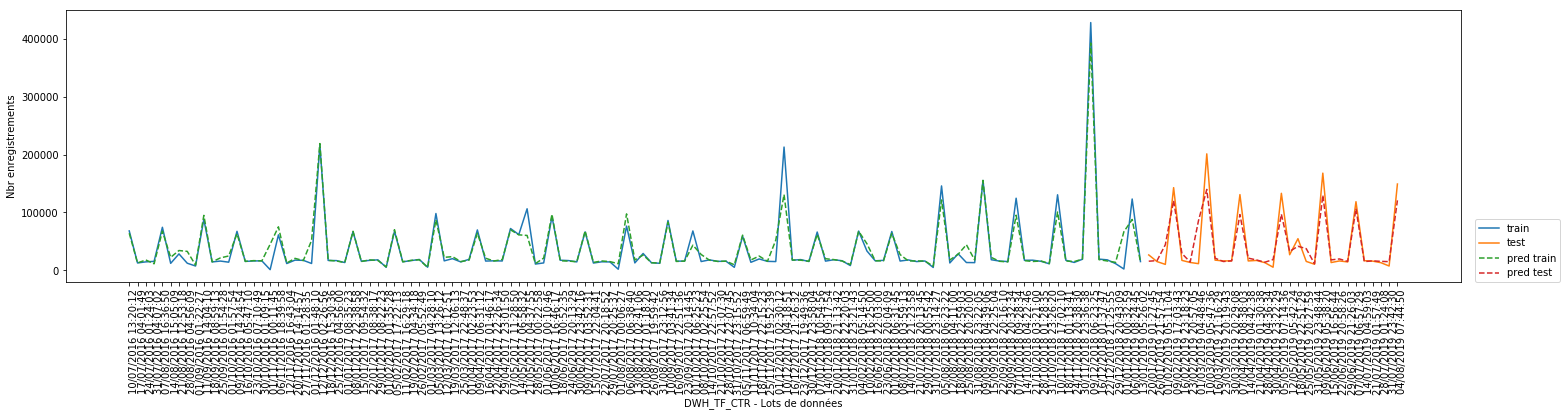

In [54]:
plt.figure( figsize = ( 25 , 5 ) )

plt.xticks( range( 0 , len( X ) ) , df[ 'NUM_LOT' ] , rotation = 90 , ha = 'left' )

plt.plot( range( n ) , y_train , label = 'train' )
plt.plot( range( n , len( y_test ) + n ) , y_test , '-' , label = 'test' )

plt.plot( range( n ) , y_train_pred , '--' , label = 'pred train' )
plt.plot( range( n , len( y_test_pred ) + n ) , y_test_pred , '--' , label = 'pred test' )

plt.legend( loc = ( 1.01 , 0 ) )
plt.xlabel( 'DWH_TF_CTR - Lots de données' )
plt.ylabel( 'Nbr enregistrements')

## Modèle de prédiction sur toutes les données disponibles

In [55]:
rfr.fit( X , y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [56]:
rfr.score( X , y )

0.8964803996430515